In [1]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
dailyData = pd.read_csv('train.csv')

In [3]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
dailyData.shape

(10886, 12)

In [5]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
dailyData['date'] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData['hour'] = dailyData.datetime.apply(lambda x : x.split()[1].split(':')[0])

In [22]:
dailyData['weekday'] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])
dailyData['month'] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString, '%Y-%m-%d').month])

In [24]:
dailyData['season'] = dailyData.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'winter'})
dailyData['weather'] = dailyData.weather.map({1:'Clear + Few clouds + Partly cloudy + Partly cloudy',
                                              2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                              3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Lkight Rain + Scattered clouds', 
                                              4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})

In [26]:
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]

In [28]:
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

In [30]:
dailyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  category
 14  weekday     10886 non-null  category
 15  month       10886 non-null  category
dtypes: category(7), float64(3), int64(4), object(2)
memory usage: 842.1+ KB


In [31]:
dailyData = dailyData.drop(['datetime'], axis=1)

In [36]:
dataTypeDF = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns={"index" : "variableType", 0: "count"})

TypeError: unsupported operand type(s) for +: 'numpy.dtype' and 'numpy.dtype'

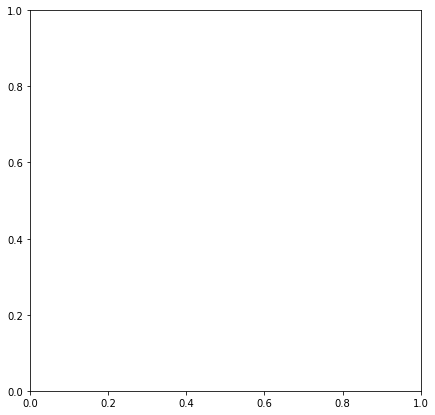

In [48]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sns.barplot(data=dataTypeDF, x='variableType')

In [43]:
dataTypeDF

,variableType,count
0,int64,4
1,float64,3
2,category,2
3,category,1
4,category,1
5,object,1
6,category,1
7,category,1
8,category,1
